In [1]:
import numpy as np
import nltk
import re

Here we import necessary packages for the N-Gram model. 

In [4]:

def ngrams_from_text(text, n):
  ngrams = [text[i:i+n] for i in range(len(text) - (n-1))]
  nminusone_grams = [tuple(text[i:i+n-1]) for i in range(len(text) - (n-1))]

  ngram_counts = {}
  nminusone_gram_counts = {}
  total_ngrams = len(ngrams)
  for ngram in ngrams:
    nminusone_gram = tuple(ngram[:-1])
    next_word = ngram[-1]

    if nminusone_gram not in ngram_counts:
      ngram_counts[nminusone_gram] = {}
      nminusone_gram_counts[nminusone_gram] = 0

    nminusone_gram_counts[nminusone_gram] += 1

    if next_word not in ngram_counts[nminusone_gram]:
      ngram_counts[nminusone_gram][next_word] = 0

    ngram_counts[nminusone_gram][next_word] += 1

  for nminusone_gram in ngram_counts:
    count = nminusone_gram_counts[nminusone_gram]

    for next_word in ngram_counts[nminusone_gram]:
      ngram_counts[nminusone_gram][next_word] /= count

  for nminusone_gram in nminusone_gram_counts:
    nminusone_gram_counts[nminusone_gram] /= total_ngrams

  return [n, nminusone_gram_counts, ngram_counts]



This function, `ngrams_from_text`, generates and calculates the probabilities of n-grams and (n-1)-grams from a given text. It takes in a string `text` and an integer `n`, representing the desired n-gram length. The function first creates two lists: `ngrams`, which contains all possible sequences of `n` consecutive characters, and `nminusone_grams`, which holds the (n-1)-grams as tuples. 

Next, it calculates frequency counts for each (n-1)-gram as well as the probabilities of observing each possible following character (or "next word") for each (n-1)-gram. Finally, these frequencies are normalized to represent probabilities, where `ngram_counts` stores the probability distribution for each "next word" following an (n-1)-gram, and `nminusone_gram_counts` gives the normalized probability of each (n-1)-gram across all generated n-grams. The function returns a list containing `n`, the probability distribution for (n-1)-grams, and the conditional probability distribution for n-grams.

In [7]:
def sample_ngram(model, length):

  n, nminusone_grams, ngrams = model

  start_index = np.random.choice(list(range(len(nminusone_grams.keys()))), p=list(nminusone_grams.values()))
  start = list(nminusone_grams.keys())[start_index]
  sampled = list(start)

  for _ in range(length):
    if n == 1:
      prev = tuple([])
    else:
      prev = tuple(sampled[-1*(n-1):])
    next = np.random.choice(list(ngrams[prev].keys()), p=list(ngrams[prev].values()))
    sampled.append(next)

  return " ".join(sampled)

The `sample_ngram` function generates a random sequence of text based on an n-gram model. It starts by picking an initial (n-1)-gram, then iteratively adds the next element by sampling from probabilities of what usually follows that (n-1)-gram in the original text. The result is a sequence that mimics the structure and patterns of the input text.

In [10]:
with open('/Users/maddiegupta/Desktop/train.txt', 'r') as file:
    train_text = file.read()
    
with open('/Users/maddiegupta/Desktop/test.txt', 'r') as file:
    test_text = file.read()

def clean_text(text):
    # Remove the Byte Order Mark (BOM) if it exists
    cleaned_text = text.replace('\ufeff', '')
    
    # Remove unwanted characters (if any) using regular expressions
    # For example, removing digits, parentheses, and punctuation not needed:
    cleaned_text = re.sub(r'[^\w\s\'\n]', '', cleaned_text)
    
    # Optional: Remove any extra spaces or weird line breaks
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    cleaned_text = cleaned_text.lower()
    
    return cleaned_text
    
train_text = clean_text(train_text)
test_text = clean_text(test_text)

This script reads two text files (`trainENG.txt` and `testENG.txt`) and cleans the text content. The `clean_text` function performs the following:

1. **Removes Byte Order Mark (BOM)**: This character (`\ufeff`), sometimes present at the start of text files, is removed.
2. **Cleans unwanted characters**: It uses a regular expression to remove any digits, parentheses, and punctuation, while keeping words, spaces, apostrophes, and line breaks.
3. **Removes extra spaces or line breaks**: Replaces multiple spaces with a single space and trims leading or trailing spaces.
4. **Converts text to lowercase**: Ensures consistency by making the text entirely lowercase.

This preprocessing prepares the text for consistent analysis or model training.

In [13]:
nish_unigram = ngrams_from_text(train_text, 1)
print(sample_ngram(nish_unigram, 100))

d i i a a g g g g   e i o a i g i z n g d o m e g w a w s a a a o d n a i m j n w b z m n g i a y i n   d   i n g n d j a a i   a a g y i h a a d n a w   m i a a a z j i   b n i g o i i a z a g g g o


In [15]:
nish_2gram = ngrams_from_text(train_text, 2)
print(sample_ngram(nish_2gram, 100))

s h k   w a n   m i i i n i   g i i   m i z i a k i w z i n   g o d o   a c n i n   w   a a k a   g i n i   n i n i w c n s a n a a a   g i w   g a a y a z h i n g   g i n i n i g i m c n   d w e   m a


In [17]:
nish_trigram = ngrams_from_text(train_text, 3)
print(sample_ngram(nish_trigram, 100))

g   o d a s h k e   d i b a   g o d   o s h   g i i g w a a w a ' i g a d a n d a s h   g e g   i n a g o   d a z h i g   e p i j i n a a w   m i i m i d i w   g e y a a i z h i g a a j a a b i   s a   a


In [19]:
nish_20gram = ngrams_from_text(train_text, 20)
print(sample_ngram(nish_20gram, 100))

e   w i i   o n i s i d o t a a g o o n   e n a a d   n i s i n g   g i i o n i i j a a n i s i   a a p i j i   g i i b a a t i i n o w a n   o d o o s h k i n i i g i i m a n   m i i   d a s h   g a a i n a a k o n i g e w a a d   j i m


In [21]:
nish_20gram = ngrams_from_text(train_text, 100)
print(sample_ngram(nish_20gram, 100))

e n s a n   g o m a a p i i   w e n a a g o s h i g   b a g w a d a k a m i g   g i i n i b a a w a g   a s h k w e y a a n g   b i a y a a w a n   a n i w   w i i k a a n e n y a n   m i i   s a   g a a i n a a d   a n i w   o w i i d i g e m a a g a n a n   n a a   s a   n a a   n a n d o d a n   g i d a n o k a a z o w i n a n   m i i   i w   a w   a k w e   g i i d a n a a n a g i d o o n g


The above are tests for grams 1, 2, 3, 20, and 100 to view their results. The unigram suprisingly follows the correct vowel and consonent patterns, although the words are unintelligible, however, the trigram, 20gram, and 100gram are astonishingly good at predicting Anishinaabemowin text. 

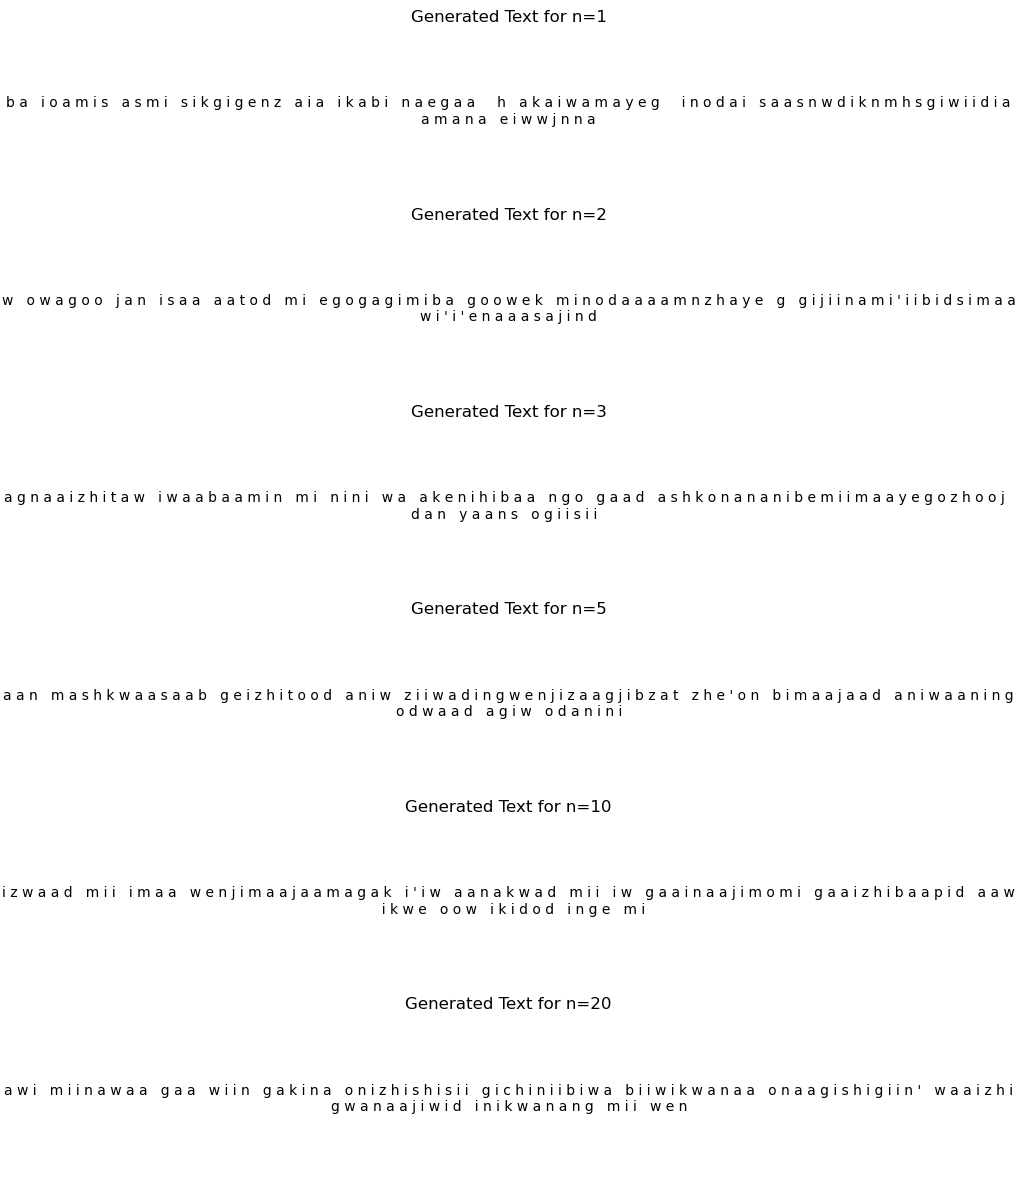

In [24]:
import matplotlib.pyplot as plt

# Modify the sample_ngram function to take the n-gram model and length as inputs
def sample_ngram(model, length):
    n, nminusone_grams, ngrams = model

    start_index = np.random.choice(list(range(len(nminusone_grams.keys()))), p=list(nminusone_grams.values()))
    start = list(nminusone_grams.keys())[start_index]
    sampled = list(start)

    for _ in range(length):
        if n == 1:
            prev = tuple([])
        else:
            prev = tuple(sampled[-1*(n-1):])
        next = np.random.choice(list(ngrams[prev].keys()), p=list(ngrams[prev].values()))
        sampled.append(next)

    return " ".join(sampled)

# Set n values to test and the length of the generated text
n_values = [1, 2, 3, 5, 10, 20]  # Different n-gram values
length = 100  # Length of generated text

# Generate samples for each n-gram value and store them
samples = {}
for n in n_values:
    model = ngrams_from_text(train_text, n)
    samples[n] = sample_ngram(model, length)

# Plot the results
plt.figure(figsize=(10, 12))
for i, n in enumerate(n_values, 1):
    plt.subplot(len(n_values), 1, i)
    plt.text(0.5, 0.5, samples[n], ha='center', va='center', wrap=True)
    plt.title(f"Generated Text for n={n}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Formatted more nicely, we can see the messages more clearly. In the trigram, some words are mispelled, but the sentence roughly translates to going forward and gathering. In the 20gram, the message is more sophisticated but doesn't completely make sense. Barring slight mispelling, it says "they will make it pleasant where there are three; he/she was separated, and the cold was intense for their young leader, who then spoke against it." The 100gram is the most successful, roughly saying "alone, when he/she was lost on the open plains, they lay down, and in the morning, he/she waited for companions. Then he/she spoke of relatives and friends, searching for your tasks. This is how they all spoke together."

In [26]:
import numpy as np

def calculate_perplexity(model, test_text):
    n, nminusone_gram_counts, ngram_counts = model
    tokens = list(test_text)  # Tokenize the test text (you can adapt this if needed)
    N = len(tokens)
    log_prob_sum = 0.0
    
    for i in range(n - 1, N):
        nminusone_gram = tuple(tokens[i - (n - 1):i])
        word = tokens[i]
        
        # Get the probability P(word | nminusone_gram)
        if nminusone_gram in ngram_counts and word in ngram_counts[nminusone_gram]:
            prob = ngram_counts[nminusone_gram][word]
        else:
            # Assign a small probability if the n-gram was not seen in training
            prob = 1e-10  # Smoothing factor for unseen n-grams

        # Accumulate the log probability
        log_prob_sum += np.log(prob)

    # Calculate perplexity
    perplexity = np.exp(-log_prob_sum / N)
    return perplexity

This function, `calculate_perplexity`, computes the perplexity of a language model on a given text. It iterates over the text to calculate the probability of each word based on its preceding words, using precomputed n-gram counts. For unseen n-grams, it applies a small smoothing factor, then combines all log probabilities to compute perplexity, which reflects the model’s ability to predict the test text.

In [35]:
nish_unigram = ngrams_from_text(train_text, 1)
print("Perplexity for unigram model:", calculate_perplexity(nish_unigram, test_text))

nish_trigram = ngrams_from_text(train_text, 3)
print("Perplexity for trigram model:", calculate_perplexity(nish_unigram, test_text))

nish_5gram = ngrams_from_text(train_text, 5)
print("Perplexity for 5gram model:", calculate_perplexity(nish_bigram, test_text))

nish_50gram = ngrams_from_text(train_text, 50)
print("Perplexity for 50gram model:", calculate_perplexity(nish_trigram, test_text))

Perplexity for unigram model: 13.169876822425833
Perplexity for trigram model: 13.169876822425833
Perplexity for 5gram model: 3.4725293085562727
Perplexity for 50gram model: 6.589043006748535


We can see off the bat that the perplexity improves moderately at first, but then gets slightly worse. 

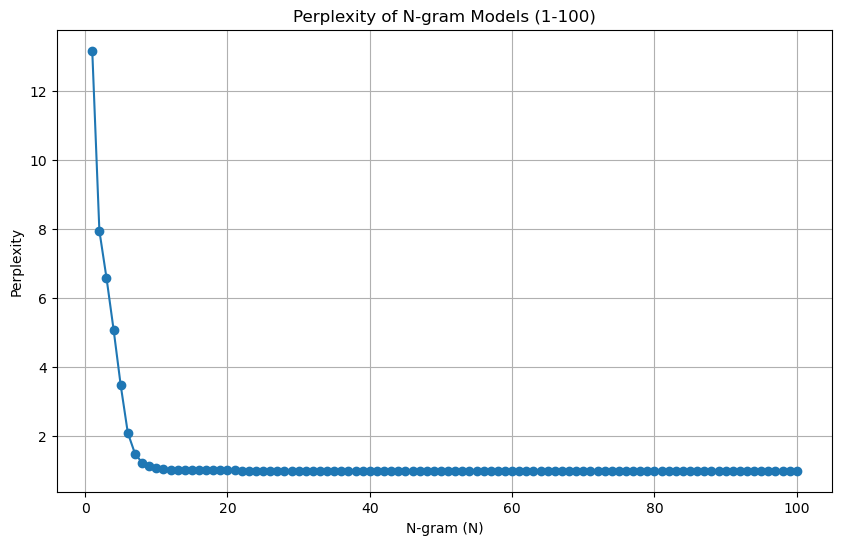

In [37]:
import matplotlib.pyplot as plt

# Initialize a list to store perplexity values for each n-gram
perplexities = []

# Calculate and store perplexity for each n-gram model (1 to 100)
for n in range(1, 101):
    n_gram_model = ngrams_from_text(train_text, n)
    perplexity = calculate_perplexity(n_gram_model, test_text)
    perplexities.append(perplexity)

# Plot the perplexity values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), perplexities, marker='o')
plt.xlabel("N-gram (N)")
plt.ylabel("Perplexity")
plt.title("Perplexity of N-gram Models (1-100)")
plt.grid(True)
plt.show()

Our plot confirms that the perplexity mostly gets better, and flattens out around 10. 

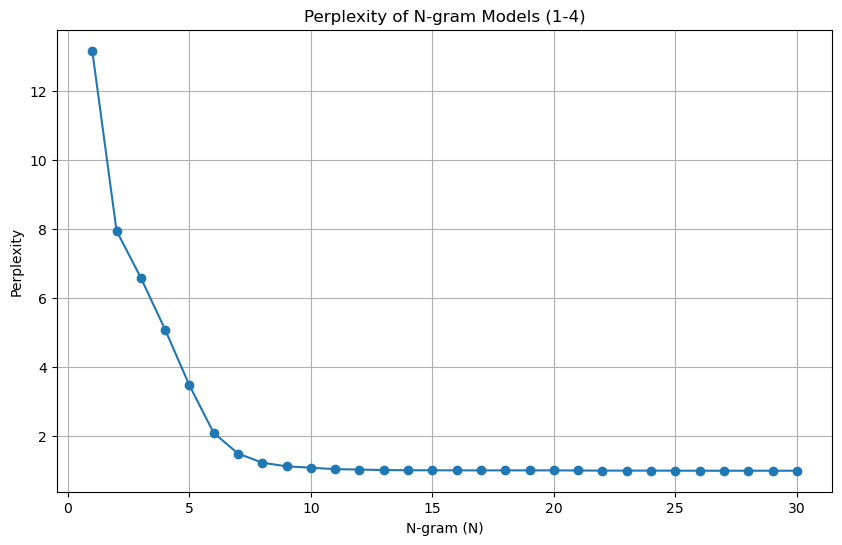

In [45]:
import matplotlib.pyplot as plt

# Initialize a list to store perplexity values for each n-gram
perplexities = []

# Calculate and store perplexity for each n-gram model (1 to 100)
for n in range(1, 31):
    n_gram_model = ngrams_from_text(train_text, n)
    perplexity = calculate_perplexity(n_gram_model, test_text)
    perplexities.append(perplexity)

# Plot the perplexity values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), perplexities, marker='o')
plt.xlabel("N-gram (N)")
plt.ylabel("Perplexity")
plt.title("Perplexity of N-gram Models (1-4)")
plt.grid(True)
plt.show()

Zooming in, we can see the perplexity gets better until about n = 10, indicating that the 10-gram is the best fit for our model. It works suprisingly well, nearly as well or as well as the English worked. It needed more information about each letter's relation to each other, but this may make sense as we consider that words in Anishinaabemowin are on average much longer than in English. As an autocomplete feature, you could save 4-5 keystrokes per work you type as it is able to correctly predict 4-5 letters consistently in a row. 